# Creating Image Trigger Poison Samples with ART

This notebook shows how to create image triggers in ART with RBG and grayscale images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
%matplotlib inline

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import PoisoningAttackBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd, add_single_bd, insert_image
from art.utils import load_mnist, preprocess, load_cifar10


In [2]:
(x_raw, y_raw), (x_raw_test, y_raw_test), min_, max_ = load_mnist()

# Random Selection:
n_train = np.shape(x_raw)[0]
num_selection = 7500
random_selection_indices = np.random.choice(n_train, num_selection)
x_raw = x_raw[random_selection_indices]
y_raw = y_raw[random_selection_indices]


In [3]:
idx = 0

### Note the shape of `x_raw`, black and white images must still have a color channel

In [4]:
print(f"x_raw shape: {x_raw.shape}")

x_raw shape: (7500, 28, 28, 1)


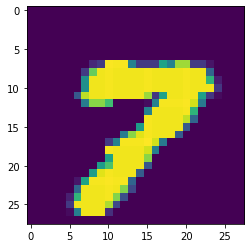

In [5]:
plt.imshow(x_raw[idx].squeeze())

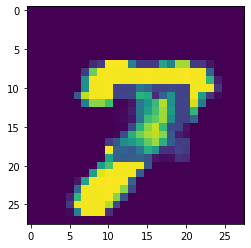

In [6]:
backdoor_attack = PoisoningAttackBackdoor(lambda x: insert_image(x, 
                                                                 backdoor_path='../images/cat.jpeg',
                                                                 size=(10,10),
                                                                 mode='L',
                                                                ))
poisoned_x, poisoned_y = backdoor_attack.poison(x_raw[:20], y_raw[:20])
plt.imshow(poisoned_x[idx].squeeze())

In [7]:
(x_raw, y_raw), (x_raw_test, y_raw_test), min_, max_ = load_cifar10()

# Random Selection:
n_train = np.shape(x_raw)[0]
num_selection = 1
random_selection_indices = np.random.choice(n_train, num_selection)
x_raw = x_raw[random_selection_indices]
y_raw = y_raw[random_selection_indices]

x_raw shape: (1, 32, 32, 3)


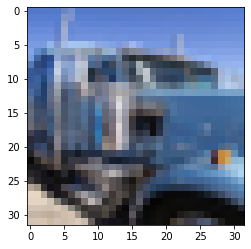

In [8]:
print(f"x_raw shape: {x_raw.shape}")
plt.imshow(x_raw[idx])

The ART method `insert_image` has different parameters that can affect image trigger generation.

If `random=True`, the image will in a different random location for each sample. If `random=False`, the placement of each trigger depends on the values of `x_shift` and `y_shift`. 

You may also set `channels_first=True` if working with images of shape `(N, C, W, H)` instead of `(N, W, H, C)`

The mode affects how Pillow processes the image. This is usually `RGB` for color images or `L` for 8-bit black and white images. More information [here](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes).

The `blend` parameter affects how much the two images should blend into each other. The default blend is 0.8

In [9]:
def poison_func(x):
    return insert_image(x, backdoor_path='../images/cat.jpeg',
                        size=(10,10), mode='RGB', blend=0.8, random=True)
backdoor_attack = PoisoningAttackBackdoor(poison_func)
poisoned_x, poisoned_y = backdoor_attack.poison(x_raw[:20], y_raw[:20])

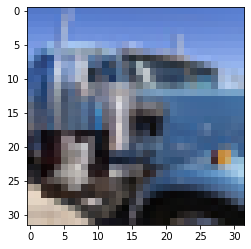

In [10]:
plt.imshow(poisoned_x[0].squeeze())